In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
%matplotlib inline

In [2]:
# Load dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target  # Features and labels

In [3]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [4]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [6]:
type(cancer.data)

numpy.ndarray

In [7]:
cancer.data.shape

(569, 30)

In [8]:
df_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
df_cancer_targets = pd.DataFrame(cancer.target, columns=["target"])
df_cancer_targets["target"].value_counts()

,count
target,
1,357
0,212


In [10]:
df_features_mean = df_cancer.iloc[:, 0:10]

<Axes: >

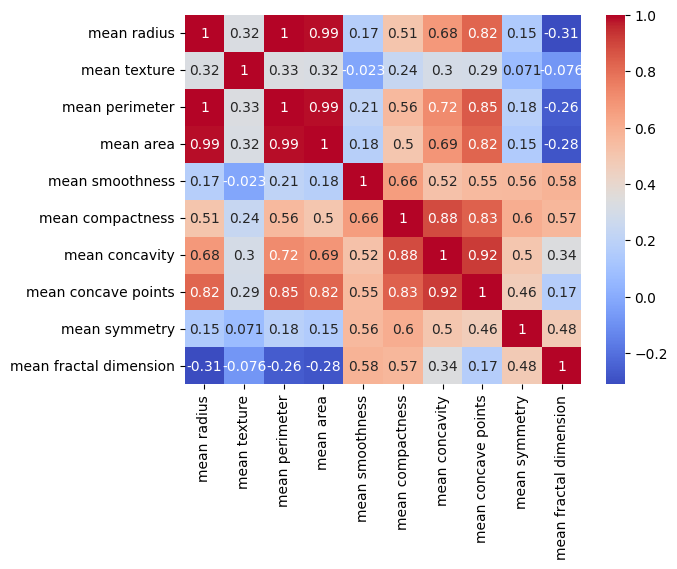

In [11]:
sns.heatmap(df_features_mean.corr(), annot=True, cmap='coolwarm')

In [12]:
# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
X_train

array([[-1.07200079, -0.6584246 , -1.0880801 , ..., -1.35052668,
        -0.35265805, -0.54138003],
       [ 1.74874285,  0.06650173,  1.75115682, ...,  1.54991557,
         0.19107787, -0.1737386 ],
       [-0.97473376, -0.93112416, -0.99770871, ..., -1.70744192,
        -0.307734  , -1.21303263],
       ...,
       [ 0.39844772,  1.06867262,  0.50751384, ...,  1.53492543,
         0.16164487,  1.23754763],
       [ 0.85331409, -0.0380331 ,  0.9054796 , ...,  2.10455077,
         0.31035897,  0.36249578],
       [-0.91179628, -0.82431683, -0.87666079, ..., -0.51332734,
        -0.50756857,  1.30824791]])

In [15]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  # Reshape for binary classification
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [16]:
# Create TensorDataset and DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [17]:
# Define the neural network model using Sequential
model = nn.Sequential(
    nn.Linear(X.shape[1], 16),  # Input layer to hidden layer
    nn.ReLU(),
    nn.Linear(16, 8),  # Second hidden layer
    nn.ReLU(),
    nn.Linear(8, 1),  # Output layer
    nn.Sigmoid()  # Sigmoid for binary classification
)

In [18]:
from torchsummary import summary
summary(model, (32, X.shape[1]))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 32, 16]             496
              ReLU-2               [-1, 32, 16]               0
            Linear-3                [-1, 32, 8]             136
              ReLU-4                [-1, 32, 8]               0
            Linear-5                [-1, 32, 1]               9
           Sigmoid-6                [-1, 32, 1]               0
Total params: 641
Trainable params: 641
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.00
Estimated Total Size (MB): 0.02
----------------------------------------------------------------


In [19]:
# Define loss function and optimizer
loss_fn = nn.BCELoss()  # Binary Cross Entropy for classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [20]:
# Training loop
num_epochs = 50
train_loss_history = []
test_accuracy_history = []

In [21]:
for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        y_pred = model(batch_X)
        loss = loss_fn(y_pred, batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    # Compute average loss
    avg_loss = total_loss / len(train_loader)
    train_loss_history.append(avg_loss)

    # Evaluate accuracy on test set
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            y_pred = model(batch_X)
            y_pred_class = (y_pred >= 0.5).float()  # Convert probabilities to binary labels
            correct += (y_pred_class == batch_y).sum().item()
            total += batch_y.size(0)

    test_accuracy = correct / total
    test_accuracy_history.append(test_accuracy)

    # Print log every 5 epochs
    if (epoch + 1) % 5 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Epoch 5/50, Loss: 0.4405, Test Accuracy: 0.9474
Epoch 10/50, Loss: 0.1353, Test Accuracy: 0.9561
Epoch 15/50, Loss: 0.0784, Test Accuracy: 0.9649
Epoch 20/50, Loss: 0.0659, Test Accuracy: 0.9737
Epoch 25/50, Loss: 0.0521, Test Accuracy: 0.9649
Epoch 30/50, Loss: 0.0456, Test Accuracy: 0.9561
Epoch 35/50, Loss: 0.0425, Test Accuracy: 0.9561
Epoch 40/50, Loss: 0.0386, Test Accuracy: 0.9474
Epoch 45/50, Loss: 0.0352, Test Accuracy: 0.9474
Epoch 50/50, Loss: 0.0313, Test Accuracy: 0.9561


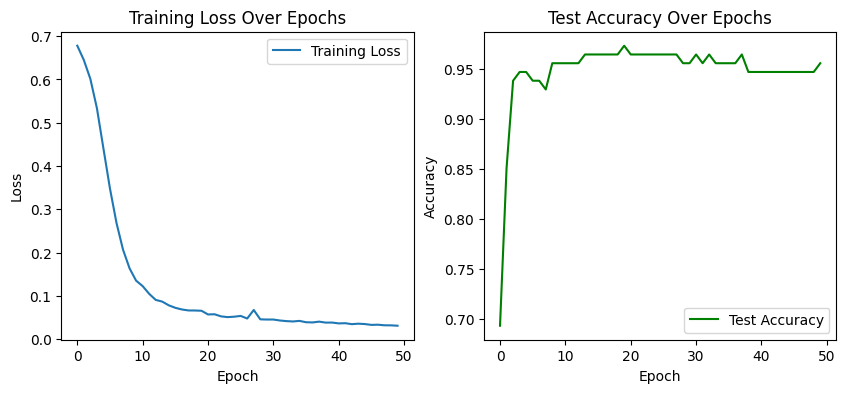

In [22]:
# Plot Training Loss and Test Accuracy
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(train_loss_history, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(test_accuracy_history, label="Test Accuracy", color="green")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Test Accuracy Over Epochs")
plt.legend()

plt.show()

In [23]:
# Final Model Evaluation on Test Set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for batch_X, batch_y in test_loader:
        y_pred = model(batch_X)
        y_pred_class = (y_pred >= 0.5).float()  # Convert probabilities to binary labels
        correct += (y_pred_class == batch_y).sum().item()
        total += batch_y.size(0)

final_accuracy = correct / total
print(f"Final Test Set Accuracy: {final_accuracy:.4f}")

Final Test Set Accuracy: 0.9561


In [24]:
from sklearn.metrics import confusion_matrix, classification_report

# Convert PyTorch predictions to NumPy arrays for sklearn functions
y_true = []         # Store true labels
y_scores = []       # Store raw probabilities (before thresholding)
y_pred_list = []    # Store predicted labels

model.eval()
with torch.no_grad():
    for batch_X, batch_y in test_loader:
        y_pred = model(batch_X)
        y_pred_class = (y_pred >= 0.5).float()  # Convert probabilities to binary labels

        y_true.extend(batch_y.cpu().numpy())
        y_scores.extend(y_pred.cpu().numpy())  # Store raw probabilities
        y_pred_list.extend(y_pred_class.cpu().numpy())

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_list)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[41  1]
 [ 4 68]]


In [25]:
tn, fp, fn, tp = conf_matrix.ravel()

print(f"True negatives: {tn}, False positives: {fp}, False negatives: {fn}, True positives: {tp}")

True negatives: 41, False positives: 1, False negatives: 4, True positives: 68


In [26]:
# Compute classification report
class_report = classification_report(y_true, y_pred_list, target_names=["No Cancer", "Cancer"])
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

   No Cancer       0.91      0.98      0.94        42
      Cancer       0.99      0.94      0.96        72

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



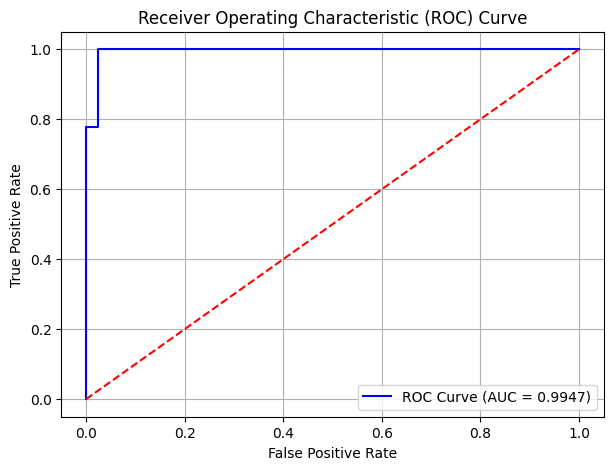

ROC AUC Score: 0.9947


In [27]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_true, y_scores)  # False Positive Rate, True Positive Rate
roc_auc = roc_auc_score(y_true, y_scores)

# Plot ROC curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color="red", linestyle="--")  # Random classifier
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.grid()
plt.show()

print(f"ROC AUC Score: {roc_auc:.4f}")

In [29]:
y_scores[:5]

[array([4.967411e-09], dtype=float32),
 array([0.99997354], dtype=float32),
 array([0.00072556], dtype=float32),
 array([0.29540884], dtype=float32),
 array([2.0409235e-10], dtype=float32)]

In [30]:
y_true[:5]

[array([0.], dtype=float32),
 array([1.], dtype=float32),
 array([0.], dtype=float32),
 array([1.], dtype=float32),
 array([0.], dtype=float32)]